In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Convert field names to dict for easy access.
# Can be hard coded 
# 
fields_path = '../../input/training_validation_2/fields.csv'  
fields_df = pd.read_csv(fields_path)
fields_df.columns = ['name', 'f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6']

fields_dict = {}
fields_dictv2 = {}

for idx in range(fields_df.shape[0]):
    name = fields_df.loc[idx, 'name']

    _fields = []
    
    for f in fields_df.columns[1:]:
        if not (str(fields_df.loc[idx, f]) == 'nan'):
            _fields.append(name + "_" + str(fields_df.loc[idx, f]))
    
    fields_dict[idx] = {'name': fields_df.loc[idx, 'name'] , 'fields': _fields}
    fields_dictv2[name] = _fields
    
# fields_dict

In [3]:
feature_list = [fields_dict[20]['name']]
feature_list_regex= "|".join(["^"+f+"_" for f in feature_list])

feature_list

['FusePicked']

In [4]:
# import data
data_df_1 = pd.read_csv("../../data/training_validation_1.csv")
data_df_2 = pd.read_csv("../../data/training_validation_2.csv")
merged_df = pd.concat([data_df_1, data_df_2], axis=0) # Merge data frames


In [5]:
train_df = merged_df.filter(regex=feature_list_regex)
# train_df = train_df.filter(regex="vCnt|value")
# train_df = data_df_2.filter(regex="^Temperature")

In [6]:
train_df.head()

,FusePicked_vCnt,FusePicked_vFreq,FusePicked_vMax,FusePicked_vMin,FusePicked_vStd,FusePicked_vTrend,FusePicked_value
0,0,0.000000,NaN,NaN,NaN,NaN,NaN
1,3,0.297310,1.0,1.0,0.0,0.0,1.0
2,3,0.296778,1.0,1.0,0.0,0.0,1.0
3,3,0.298541,1.0,1.0,0.0,0.0,1.0
4,3,0.298555,1.0,1.0,0.0,0.0,1.0


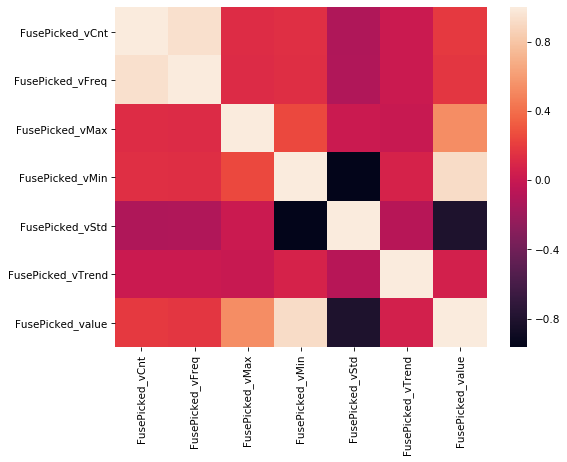

In [7]:
fig = plt.figure(figsize=(8,6), dpi=75)
sns.heatmap(train_df.corr(),annot=False)

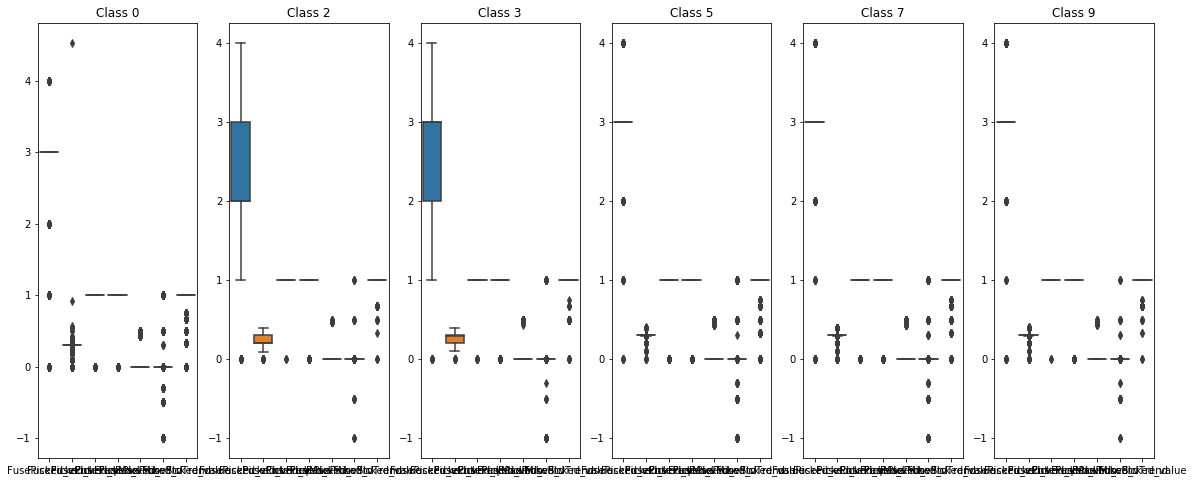

In [8]:
# fig = plt.figure(figsize=(10, 8), dpi=75)


classes = data_df_2['class'].unique()

fig, axes = plt.subplots(1, len(classes), sharex=True, figsize=(20,8))
# fig.suptitle('1 row x 2 columns axes with no data')

for idx, c in enumerate(classes):
    df = train_df[merged_df['class'] == c].copy()
#     df = train_df.copy()
    sns.boxplot(data=df, ax=axes[idx])
    axes[idx].set_title('Class '+str(c))


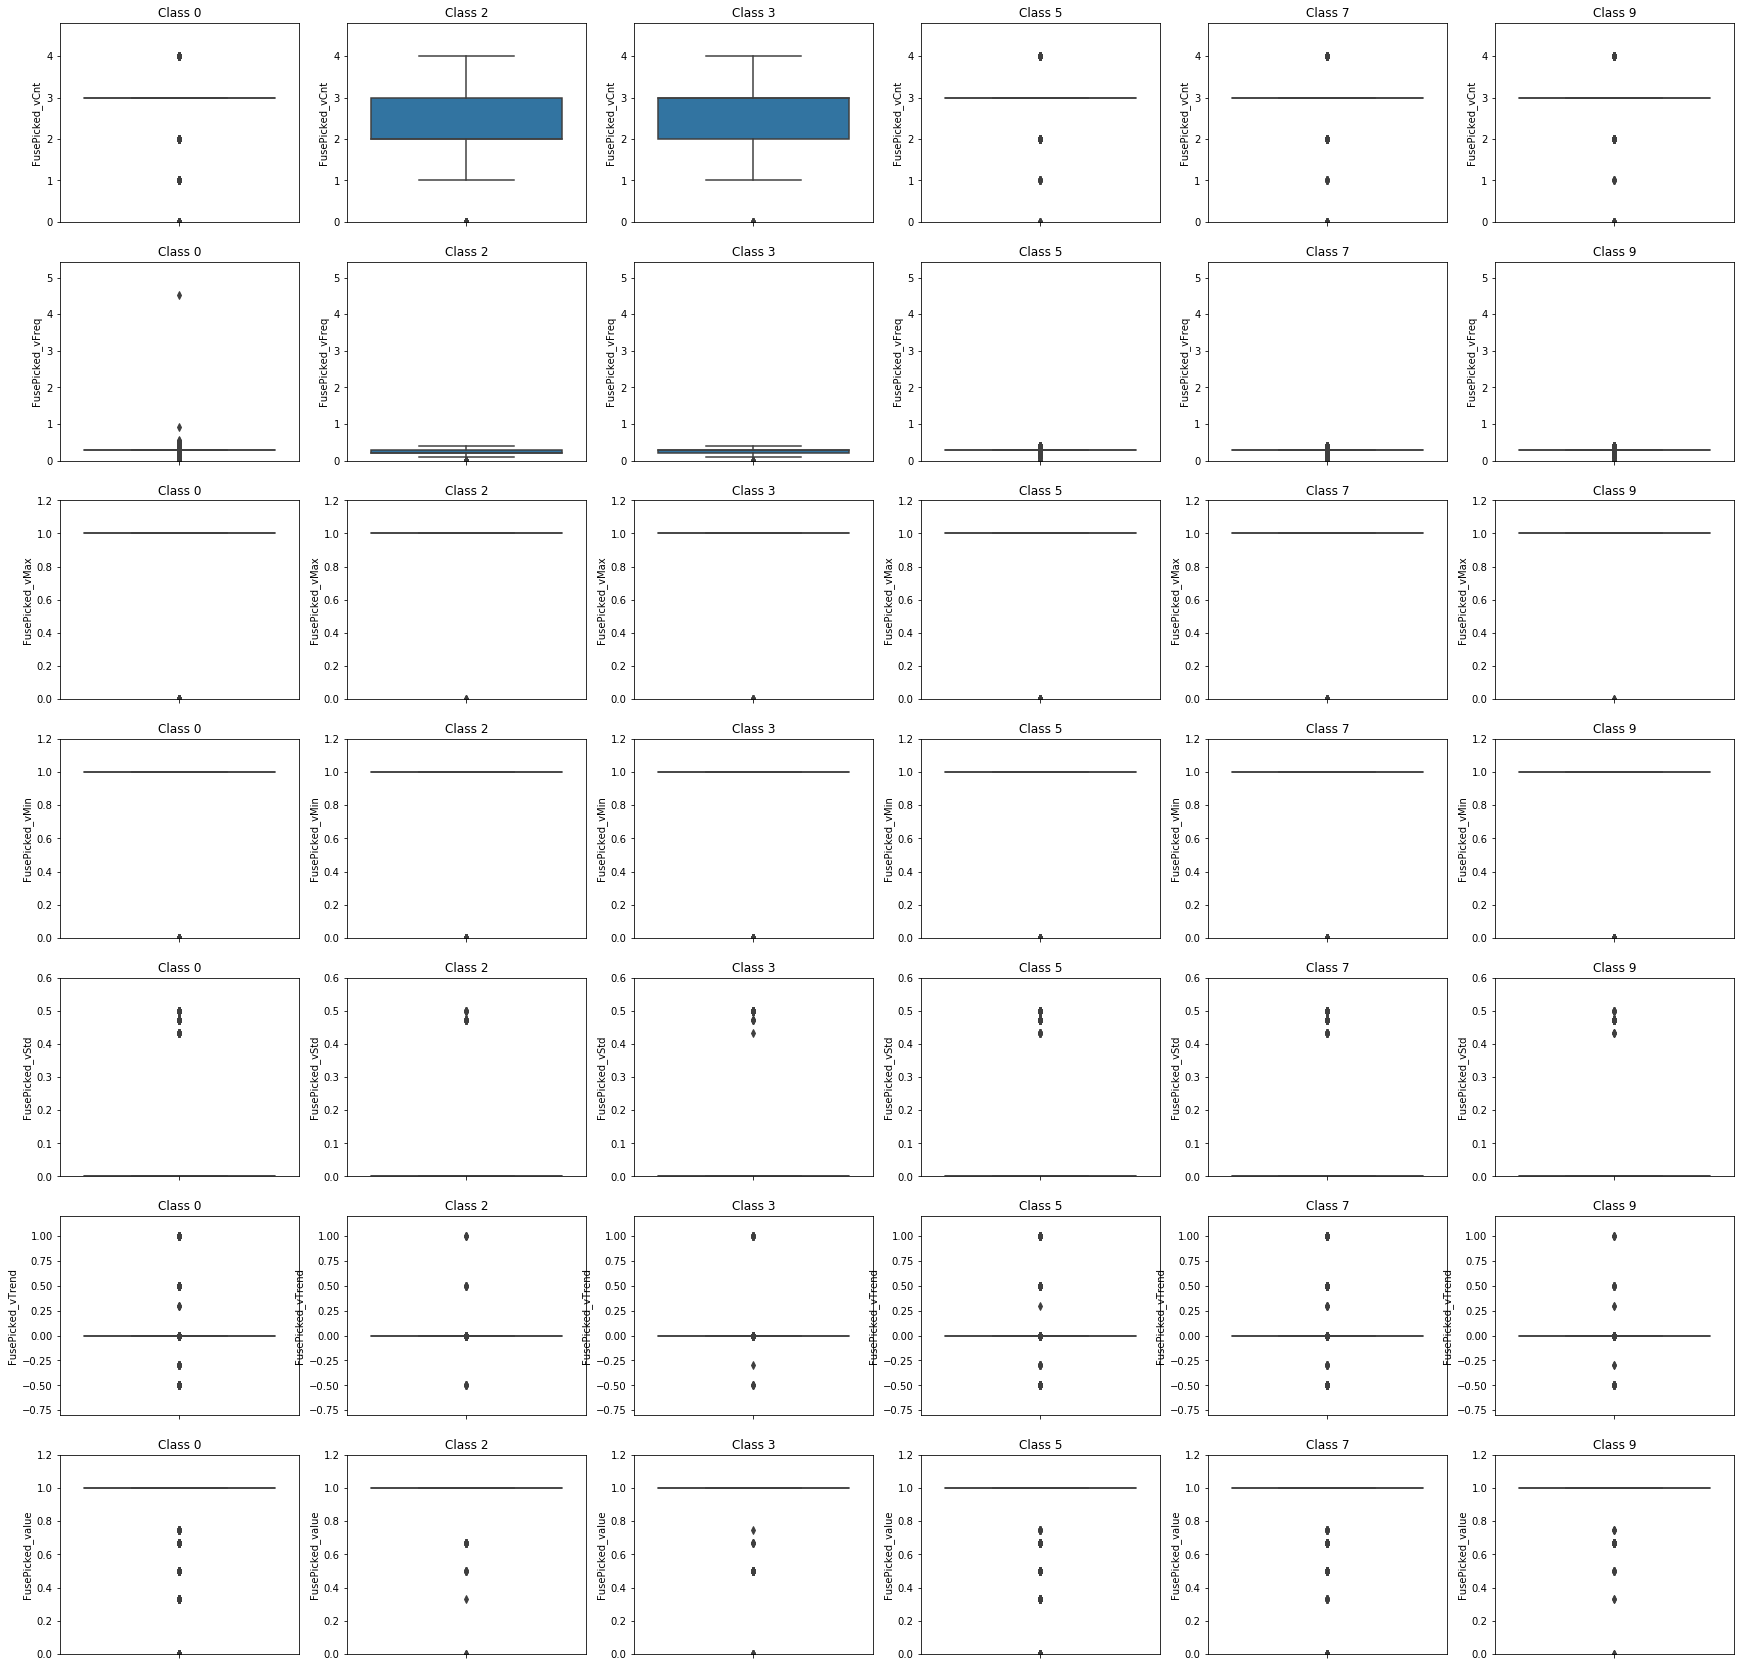

In [9]:
# fig = plt.figure(figsize=(10, 8), dpi=75)


classes = data_df_2['class'].unique()
features = train_df.columns

fig, axes = plt.subplots(len(features), len(classes), sharex=True, figsize=(30,30))
# print (axes)
# fig.suptitle('1 row x 2 columns axes with no data')

for idx1, f in enumerate(features):
    df = merged_df[[f, 'class']].copy()
    for idx2, c in enumerate(classes):
        df2 = df[df['class'] == c].copy()
#         print (f, c, df2.columns)
        sns.boxplot(y=df2[f], ax=axes[idx1, idx2])
        axes[idx1, idx2].set_title('Class '+str(c))
        axes[idx1, idx2].set_ylim(0.8*df[f].min(), 1.2*df[f].max())


In [10]:
# classes = data_df_2['class'].unique()
# features = train_df.columns

# fig, axes = plt.subplots(len(features), 1, sharex=True, figsize=(30,16))

# for idx1, f in enumerate(features):
#     df = data_df_2[[f, 'class']].copy()
#     axes[idx1].set_title('Feature '+str(f))
#     for idx2, c in enumerate(classes):
#         df2 = df[df['class'] == c].copy()
#         axes[idx1].boxplot(x=df2[f], positions=[idx2], labels=[c])
    


In [11]:
# train_df2 = pd.concat([data_df_2['class'], train_df], axis=1)
# axes = train_df2.groupby('class').boxplot(figsize=(20, 10))

In [12]:
classes = data_df_2['class'].unique()
features = train_df.columns

new_df = pd.DataFrame()

df_list = []

for idx1, f in enumerate(features):
    df = merged_df[[f, 'class']].copy()
    data = [[
        99, f, df[f].max(), df[f].min(), df[f].std(), df[f].mean(), df[f].median(), df[f].count(), df[f].isna().sum(),
        ]]

    data_df = pd.DataFrame(data)

    df_list.append(data_df)

    for idx2, c in enumerate(classes):
        df2 = df[df['class'] == c].copy()

        data = [[
            c, f, df2[f].max(), df2[f].min(), df2[f].std(), df2[f].mean(), df2[f].median(), df2[f].count(), df2[f].isna().sum(),
            ]]
        
        data_df = pd.DataFrame(data)
        df_list.append(data_df)
        
new_df = pd.concat(df_list, axis=0)
        
new_df.columns = ['class', 'feature', 'max', 'min', 'std', 'mean', 'median', 'Count', 'NA_count']

In [13]:
new_df[new_df['class']==99]

,class,feature,max,min,std,mean,median,Count,NA_count
0,99,FusePicked_vCnt,4.000000,0.0,0.666955,2.979703,3.000000,39611,0
0,99,FusePicked_vFreq,4.530106,0.0,0.069753,0.296673,0.298733,39611,0
0,99,FusePicked_vMax,1.000000,0.0,0.062154,0.996122,1.000000,39195,416
0,99,FusePicked_vMin,1.000000,0.0,0.236319,0.940630,1.000000,39195,416
0,99,FusePicked_vStd,0.500000,0.0,0.109626,0.026558,0.000000,39195,416
0,99,FusePicked_vTrend,1.000000,-1.0,0.154240,-0.002863,0.000000,38557,1054
0,99,FusePicked_value,1.000000,0.0,0.113507,0.973702,1.000000,39195,416


In [14]:
missing = 0

for c in classes:
    class_df = merged_df[merged_df['class']==c]
    runs = class_df['run'].unique()
    for r in runs:
        run_df = class_df[class_df['run'] == r]
        for f in features:
            f_df = run_df.filter([f]).copy().reset_index()
            del f_df['index']
            l = len(f_df)
            n_df = f_df[f_df[f].isna()]
#             if len(f_df) != len(n_df): print (c, r, f, len(f_df), len(n_df))
            if (len(n_df) == 0): continue
            missing += len(n_df)
            for i in list(n_df.index):
                if ((i == 0) | (i == l-1)): 
                    print ('NA at start or end')
                else:
                    print (c, r, f, len(f_df), list(n_df.index))
print (missing)

NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
0 11 FusePicked_vTrend 361 [0, 171, 214, 360]
0 11 FusePicked_vTrend 361 [0, 171, 214, 360]
NA at start or end
NA at start or end
NA at start or end
NA at start or end
0 17 FusePicked_vMax 362 [0, 1, 361]
NA at start or end
NA at start or end
0 17 FusePicked_vMin 362 [0, 1, 361]
NA at start or end
NA at start or end
0 17 FusePicked_vStd 362 [0, 1, 361]
NA at start or end
NA at start or end
0 17 FusePicked_vTrend 362 [0, 1, 361]
NA at start or end
NA at start or end
0 17 FusePicked_value 362 [0, 1, 361]
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or en

NA at start or end
0 60 FusePicked_vStd 1081 [0, 1, 2, 3, 1080]
0 60 FusePicked_vStd 1081 [0, 1, 2, 3, 1080]
0 60 FusePicked_vStd 1081 [0, 1, 2, 3, 1080]
NA at start or end
NA at start or end
0 60 FusePicked_vTrend 1081 [0, 1, 2, 3, 93, 275, 294, 330, 1016, 1080]
0 60 FusePicked_vTrend 1081 [0, 1, 2, 3, 93, 275, 294, 330, 1016, 1080]
0 60 FusePicked_vTrend 1081 [0, 1, 2, 3, 93, 275, 294, 330, 1016, 1080]
0 60 FusePicked_vTrend 1081 [0, 1, 2, 3, 93, 275, 294, 330, 1016, 1080]
0 60 FusePicked_vTrend 1081 [0, 1, 2, 3, 93, 275, 294, 330, 1016, 1080]
0 60 FusePicked_vTrend 1081 [0, 1, 2, 3, 93, 275, 294, 330, 1016, 1080]
0 60 FusePicked_vTrend 1081 [0, 1, 2, 3, 93, 275, 294, 330, 1016, 1080]
0 60 FusePicked_vTrend 1081 [0, 1, 2, 3, 93, 275, 294, 330, 1016, 1080]
NA at start or end
NA at start or end
0 60 FusePicked_value 1081 [0, 1, 2, 3, 1080]
0 60 FusePicked_value 1081 [0, 1, 2, 3, 1080]
0 60 FusePicked_value 1081 [0, 1, 2, 3, 1080]
NA at start or end
NA at start or end
0 66 FusePicked_vM

NA at start or end
0 90 FusePicked_vTrend 357 [79, 310, 355, 356]
0 90 FusePicked_vTrend 357 [79, 310, 355, 356]
0 90 FusePicked_vTrend 357 [79, 310, 355, 356]
NA at start or end
NA at start or end
NA at start or end
0 91 FusePicked_vMax 358 [0, 356, 357]
NA at start or end
NA at start or end
0 91 FusePicked_vMin 358 [0, 356, 357]
NA at start or end
NA at start or end
0 91 FusePicked_vStd 358 [0, 356, 357]
NA at start or end
NA at start or end
0 91 FusePicked_vTrend 358 [0, 56, 289, 356, 357]
0 91 FusePicked_vTrend 358 [0, 56, 289, 356, 357]
0 91 FusePicked_vTrend 358 [0, 56, 289, 356, 357]
NA at start or end
NA at start or end
0 91 FusePicked_value 358 [0, 356, 357]
NA at start or end
0 93 FusePicked_vMax 361 [359, 360]
NA at start or end
0 93 FusePicked_vMin 361 [359, 360]
NA at start or end
0 93 FusePicked_vStd 361 [359, 360]
NA at start or end
0 93 FusePicked_vTrend 361 [49, 359, 360]
0 93 FusePicked_vTrend 361 [49, 359, 360]
NA at start or end
0 93 FusePicked_value 361 [359, 360]


2 2 FusePicked_vMax 1079 [0, 1, 109, 117, 118, 224, 247, 250, 251, 420, 466, 468, 532, 564, 592, 594, 597, 598, 600, 601, 622, 633, 657, 662, 663, 664, 682, 689, 696, 717, 720, 782, 813, 843, 873, 874, 894, 896, 900, 929, 985, 986, 1022, 1072, 1078]
2 2 FusePicked_vMax 1079 [0, 1, 109, 117, 118, 224, 247, 250, 251, 420, 466, 468, 532, 564, 592, 594, 597, 598, 600, 601, 622, 633, 657, 662, 663, 664, 682, 689, 696, 717, 720, 782, 813, 843, 873, 874, 894, 896, 900, 929, 985, 986, 1022, 1072, 1078]
2 2 FusePicked_vMax 1079 [0, 1, 109, 117, 118, 224, 247, 250, 251, 420, 466, 468, 532, 564, 592, 594, 597, 598, 600, 601, 622, 633, 657, 662, 663, 664, 682, 689, 696, 717, 720, 782, 813, 843, 873, 874, 894, 896, 900, 929, 985, 986, 1022, 1072, 1078]
2 2 FusePicked_vMax 1079 [0, 1, 109, 117, 118, 224, 247, 250, 251, 420, 466, 468, 532, 564, 592, 594, 597, 598, 600, 601, 622, 633, 657, 662, 663, 664, 682, 689, 696, 717, 720, 782, 813, 843, 873, 874, 894, 896, 900, 929, 985, 986, 1022, 1072, 1078]


2 2 FusePicked_vTrend 1079 [0, 1, 2, 37, 39, 58, 59, 60, 61, 64, 65, 82, 104, 108, 109, 112, 113, 115, 117, 118, 119, 133, 134, 136, 138, 144, 177, 222, 223, 224, 247, 248, 249, 250, 251, 254, 274, 275, 280, 283, 312, 318, 321, 323, 324, 404, 420, 421, 423, 426, 429, 461, 466, 468, 470, 472, 474, 490, 494, 500, 502, 503, 504, 519, 522, 524, 529, 531, 532, 564, 565, 568, 587, 589, 592, 594, 596, 597, 598, 599, 600, 601, 617, 618, 622, 626, 627, 628, 629, 630, 633, 649, 651, 654, 657, 660, 661, 662, 663, 664, 679, 682, 689, 692, 693, 696, 711, 712, 713, 715, 716, 717, 718, 720, 722, 723, 728, 737, 744, 762, 763, 766, 770, 772, 773, 774, 782, 783, 797, 799, 802, 803, 805, 806, 808, 809, 812, 813, 831, 833, 835, 836, 837, 838, 840, 841, 843, 846, 858, 863, 869, 871, 873, 874, 875, 890, 891, 892, 893, 894, 896, 897, 898, 899, 900, 916, 917, 920, 923, 926, 928, 929, 953, 955, 956, 957, 983, 984, 985, 986, 989, 990, 1013, 1017, 1018, 1022, 1023, 1025, 1040, 1045, 1051, 1054, 1055, 1056, 1072,

NA at start or end
2 3 FusePicked_vMax 1035 [0, 1, 2, 3, 28, 30, 32, 33, 34, 38, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 58, 59, 60, 61, 63, 64, 65, 66, 72, 73, 74, 75, 115, 119, 120, 121, 123, 125, 126, 127, 130, 169, 170, 171, 172, 177, 178, 179, 182, 184, 188, 190, 195, 196, 199, 202, 211, 212, 214, 215, 216, 217, 218, 222, 223, 224, 225, 359, 360, 367, 368, 370, 373, 374, 376, 378, 402, 404, 409, 414, 417, 450, 459, 460, 467, 473, 523, 525, 530, 535, 538, 539, 542, 543, 561, 565, 567, 568, 569, 570, 576, 578, 580, 583, 584, 585, 640, 644, 650, 651, 656, 657, 659, 661, 662, 664, 665, 667, 711, 712, 762, 771, 823, 824, 827, 884, 890, 896, 898, 902, 903, 905, 925, 926, 933, 934, 966, 974, 976, 1011, 1015, 1025, 1026, 1027, 1028, 1029, 1030, 1031]
2 3 FusePicked_vMax 1035 [0, 1, 2, 3, 28, 30, 32, 33, 34, 38, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 58, 59, 60, 61, 63, 64, 65, 66, 72, 73, 74, 75, 115, 119, 120, 121, 123, 125, 126, 127, 130, 169, 170, 171, 172, 177, 178, 179, 182,

2 3 FusePicked_vMin 1035 [0, 1, 2, 3, 28, 30, 32, 33, 34, 38, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 58, 59, 60, 61, 63, 64, 65, 66, 72, 73, 74, 75, 115, 119, 120, 121, 123, 125, 126, 127, 130, 169, 170, 171, 172, 177, 178, 179, 182, 184, 188, 190, 195, 196, 199, 202, 211, 212, 214, 215, 216, 217, 218, 222, 223, 224, 225, 359, 360, 367, 368, 370, 373, 374, 376, 378, 402, 404, 409, 414, 417, 450, 459, 460, 467, 473, 523, 525, 530, 535, 538, 539, 542, 543, 561, 565, 567, 568, 569, 570, 576, 578, 580, 583, 584, 585, 640, 644, 650, 651, 656, 657, 659, 661, 662, 664, 665, 667, 711, 712, 762, 771, 823, 824, 827, 884, 890, 896, 898, 902, 903, 905, 925, 926, 933, 934, 966, 974, 976, 1011, 1015, 1025, 1026, 1027, 1028, 1029, 1030, 1031]
2 3 FusePicked_vMin 1035 [0, 1, 2, 3, 28, 30, 32, 33, 34, 38, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 58, 59, 60, 61, 63, 64, 65, 66, 72, 73, 74, 75, 115, 119, 120, 121, 123, 125, 126, 127, 130, 169, 170, 171, 172, 177, 178, 179, 182, 184, 188, 190, 195

2 3 FusePicked_vStd 1035 [0, 1, 2, 3, 28, 30, 32, 33, 34, 38, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 58, 59, 60, 61, 63, 64, 65, 66, 72, 73, 74, 75, 115, 119, 120, 121, 123, 125, 126, 127, 130, 169, 170, 171, 172, 177, 178, 179, 182, 184, 188, 190, 195, 196, 199, 202, 211, 212, 214, 215, 216, 217, 218, 222, 223, 224, 225, 359, 360, 367, 368, 370, 373, 374, 376, 378, 402, 404, 409, 414, 417, 450, 459, 460, 467, 473, 523, 525, 530, 535, 538, 539, 542, 543, 561, 565, 567, 568, 569, 570, 576, 578, 580, 583, 584, 585, 640, 644, 650, 651, 656, 657, 659, 661, 662, 664, 665, 667, 711, 712, 762, 771, 823, 824, 827, 884, 890, 896, 898, 902, 903, 905, 925, 926, 933, 934, 966, 974, 976, 1011, 1015, 1025, 1026, 1027, 1028, 1029, 1030, 1031]
2 3 FusePicked_vStd 1035 [0, 1, 2, 3, 28, 30, 32, 33, 34, 38, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 58, 59, 60, 61, 63, 64, 65, 66, 72, 73, 74, 75, 115, 119, 120, 121, 123, 125, 126, 127, 130, 169, 170, 171, 172, 177, 178, 179, 182, 184, 188, 190, 195

2 3 FusePicked_vTrend 1035 [0, 1, 2, 3, 4, 20, 25, 27, 28, 30, 32, 33, 34, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 71, 72, 73, 74, 75, 76, 77, 78, 109, 112, 114, 115, 116, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 130, 164, 165, 166, 168, 169, 170, 171, 172, 173, 174, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 195, 196, 197, 198, 199, 200, 202, 203, 204, 205, 206, 207, 209, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 227, 275, 276, 277, 278, 279, 315, 359, 360, 363, 365, 367, 368, 370, 371, 373, 374, 376, 377, 378, 379, 380, 395, 400, 402, 403, 404, 406, 409, 410, 411, 412, 413, 414, 415, 416, 417, 449, 450, 451, 452, 454, 455, 457, 458, 459, 460, 461, 462, 463, 464, 467, 468, 470, 473, 518, 519, 523, 524, 525, 526, 528, 530, 532, 533, 535, 536, 538, 539, 540, 542, 543, 544, 559, 561, 563, 565, 567, 568, 569, 570, 572, 573

2 3 FusePicked_vTrend 1035 [0, 1, 2, 3, 4, 20, 25, 27, 28, 30, 32, 33, 34, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 71, 72, 73, 74, 75, 76, 77, 78, 109, 112, 114, 115, 116, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 130, 164, 165, 166, 168, 169, 170, 171, 172, 173, 174, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 195, 196, 197, 198, 199, 200, 202, 203, 204, 205, 206, 207, 209, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 227, 275, 276, 277, 278, 279, 315, 359, 360, 363, 365, 367, 368, 370, 371, 373, 374, 376, 377, 378, 379, 380, 395, 400, 402, 403, 404, 406, 409, 410, 411, 412, 413, 414, 415, 416, 417, 449, 450, 451, 452, 454, 455, 457, 458, 459, 460, 461, 462, 463, 464, 467, 468, 470, 473, 518, 519, 523, 524, 525, 526, 528, 530, 532, 533, 535, 536, 538, 539, 540, 542, 543, 544, 559, 561, 563, 565, 567, 568, 569, 570, 572, 573

2 3 FusePicked_value 1035 [0, 1, 2, 3, 28, 30, 32, 33, 34, 38, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 58, 59, 60, 61, 63, 64, 65, 66, 72, 73, 74, 75, 115, 119, 120, 121, 123, 125, 126, 127, 130, 169, 170, 171, 172, 177, 178, 179, 182, 184, 188, 190, 195, 196, 199, 202, 211, 212, 214, 215, 216, 217, 218, 222, 223, 224, 225, 359, 360, 367, 368, 370, 373, 374, 376, 378, 402, 404, 409, 414, 417, 450, 459, 460, 467, 473, 523, 525, 530, 535, 538, 539, 542, 543, 561, 565, 567, 568, 569, 570, 576, 578, 580, 583, 584, 585, 640, 644, 650, 651, 656, 657, 659, 661, 662, 664, 665, 667, 711, 712, 762, 771, 823, 824, 827, 884, 890, 896, 898, 902, 903, 905, 925, 926, 933, 934, 966, 974, 976, 1011, 1015, 1025, 1026, 1027, 1028, 1029, 1030, 1031]
2 3 FusePicked_value 1035 [0, 1, 2, 3, 28, 30, 32, 33, 34, 38, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 58, 59, 60, 61, 63, 64, 65, 66, 72, 73, 74, 75, 115, 119, 120, 121, 123, 125, 126, 127, 130, 169, 170, 171, 172, 177, 178, 179, 182, 184, 188, 190, 1

2 4 FusePicked_vTrend 360 [5, 10, 14, 16, 75, 78, 79, 82, 83, 86, 89, 91, 92, 93, 95, 97, 98, 99, 116, 118, 119, 121, 124, 125, 129, 130, 132, 133, 134, 136, 138, 139, 140, 141, 142, 156, 159, 160, 161, 166, 168, 169, 172, 185, 186, 188, 189, 191, 192, 195, 196, 197, 198, 215, 216, 217, 218, 220, 221, 223, 224, 226, 227, 228, 229, 230, 231, 232, 237, 249, 252, 253, 254, 255, 256, 257, 258, 260, 261, 262, 264, 280, 281, 283, 284, 285, 287, 288, 291, 293, 294, 296, 297, 332, 335, 343, 344, 345, 348, 349, 350, 352, 356, 359]
2 4 FusePicked_vTrend 360 [5, 10, 14, 16, 75, 78, 79, 82, 83, 86, 89, 91, 92, 93, 95, 97, 98, 99, 116, 118, 119, 121, 124, 125, 129, 130, 132, 133, 134, 136, 138, 139, 140, 141, 142, 156, 159, 160, 161, 166, 168, 169, 172, 185, 186, 188, 189, 191, 192, 195, 196, 197, 198, 215, 216, 217, 218, 220, 221, 223, 224, 226, 227, 228, 229, 230, 231, 232, 237, 249, 252, 253, 254, 255, 256, 257, 258, 260, 261, 262, 264, 280, 281, 283, 284, 285, 287, 288, 291, 293, 294, 296, 297,

NA at start or end
3 2 FusePicked_vMax 1079 [0, 1, 2, 3, 512]
3 2 FusePicked_vMax 1079 [0, 1, 2, 3, 512]
3 2 FusePicked_vMax 1079 [0, 1, 2, 3, 512]
3 2 FusePicked_vMax 1079 [0, 1, 2, 3, 512]
NA at start or end
3 2 FusePicked_vMin 1079 [0, 1, 2, 3, 512]
3 2 FusePicked_vMin 1079 [0, 1, 2, 3, 512]
3 2 FusePicked_vMin 1079 [0, 1, 2, 3, 512]
3 2 FusePicked_vMin 1079 [0, 1, 2, 3, 512]
NA at start or end
3 2 FusePicked_vStd 1079 [0, 1, 2, 3, 512]
3 2 FusePicked_vStd 1079 [0, 1, 2, 3, 512]
3 2 FusePicked_vStd 1079 [0, 1, 2, 3, 512]
3 2 FusePicked_vStd 1079 [0, 1, 2, 3, 512]
NA at start or end
3 2 FusePicked_vTrend 1079 [0, 1, 2, 3, 70, 142, 183, 245, 280, 292, 377, 509, 512, 537, 566, 588, 603, 613, 725, 757, 809, 818, 830, 840, 877, 898, 918, 947, 956, 990]
3 2 FusePicked_vTrend 1079 [0, 1, 2, 3, 70, 142, 183, 245, 280, 292, 377, 509, 512, 537, 566, 588, 603, 613, 725, 757, 809, 818, 830, 840, 877, 898, 918, 947, 956, 990]
3 2 FusePicked_vTrend 1079 [0, 1, 2, 3, 70, 142, 183, 245, 280, 292, 3

NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
5 2 FusePicked_vMax 1078 [0, 1, 2]
5 2 FusePicked_vMax 1078 [0, 1, 2]
NA at start or end
5 2 FusePicked_vMin 1078 [0, 1, 2]
5 2 FusePicked_vMin 1078 [0, 1, 2]
NA at start or end
5 2 FusePicked_vStd 1078 [0, 1, 2]
5 2 FusePicked_vStd 1078 [0, 1, 2]
NA at start or end
5 2 FusePicked_vTrend 1078 [0, 1, 2, 3, 101, 211, 832, 952, 1050, 1077]
5 2 FusePicked_vTrend 1078 [0, 1, 2, 3, 101, 211, 832, 952, 1050, 1077]
5 2 FusePicked_vTrend 1078 [0, 1, 2, 3, 101, 211, 832, 952, 1050, 1077]
5 2 FusePicked_vTrend 1078 [0, 1, 2, 3, 101, 211, 832, 952, 1050, 1077]
5 2 FusePicked_vTrend 1078 [0, 1, 2, 3, 101, 211, 832, 952, 1050, 1077]
5 2 FusePicked_vTrend 1078 [0, 1, 2, 3, 101, 211, 832, 952, 1050, 1077]
5 2 FusePicked_vTrend 1078 [0, 1, 2, 3, 101, 211, 832, 952, 1050, 1077]
5 2 FusePicked_vTren

9 3 FusePicked_vStd 1079 [0, 1, 2, 1078]
NA at start or end
NA at start or end
9 3 FusePicked_vTrend 1079 [0, 1, 2, 220, 1078]
9 3 FusePicked_vTrend 1079 [0, 1, 2, 220, 1078]
9 3 FusePicked_vTrend 1079 [0, 1, 2, 220, 1078]
NA at start or end
NA at start or end
9 3 FusePicked_value 1079 [0, 1, 2, 1078]
9 3 FusePicked_value 1079 [0, 1, 2, 1078]
NA at start or end
9 5 FusePicked_vMax 361 [359, 360]
NA at start or end
9 5 FusePicked_vMin 361 [359, 360]
NA at start or end
9 5 FusePicked_vStd 361 [359, 360]
NA at start or end
NA at start or end
9 5 FusePicked_vTrend 361 [0, 61, 359, 360]
9 5 FusePicked_vTrend 361 [0, 61, 359, 360]
NA at start or end
9 5 FusePicked_value 361 [359, 360]
NA at start or end
2718
